In [35]:
import pandas as pd

df_facture = pd.read_csv("facture.csv", delimiter=",")
df_fournisseur = pd.read_csv("fournisseur.csv", delimiter=",")
df_achat = pd.read_csv("achat.csv", delimiter=",")


In [36]:
df_achat

,id,num_facture,ref,designation,qte,prix_unit,montant,tva
0,1,23/0805,C13T00S44A,EPSON Bouteille D'encre ECOTANK 103 -Jaune,1,34.000,34.000,19 %
1,2,23/0805,CT3TOOS34A,EPSON Bouteille D'éncre ECOTANK 103 - Magenta,1,34.000,34.000,19 %
2,3,23/0805,C13T00S24A,EPSON Bouteille D'encre ECOTANK 103 - Cyan,1,34.000,34.000,19 %
3,4,23/0805,C13T00S14A,EPSON Bouteille D'encre ECOTANK 103 - Noir,1,34.000,34.000,19 %
4,5,23/0687,CZ102AE,Cartouche HP COULEUR N°650 pour 2515-1050,1,55.000,55.000,19 %
5,6,23/0687,CLS-7100RF,ADVANCE ELITE COMBO PACK CLAV+SOUR+TAPIS,5,48.000,240.000,7 %
6,7,23/0687,ADAP-DISPLAY,ADAPTATEUR DISPLAY PORT M TO VGA F,2,30.000,60.000,19 %
7,8,23/0683,151559,Converstisseur HDMI male TO VGA female with audio,2,66.000,132.000,19 %
8,9,23/0683,CZ102AE,Cartouche HP COULEUR N°650 pour 2515-1050,1,55.000,55.000,19 %
9,10,23/0683,CLS-7100RF,ADVANCE ELITE COMBO PACK CLAV+SOUR+TAPIS,5,48.000,240.000,7 %


In [37]:
df_fournisseur

,fournisseur,adresse_f,tel_fournisseur,fax_fournisseur
0,Scoop Informatique,IMM A16 Centre Urbain Nord 1003 Tunis,71 822 435,71 822 742
1,tunisianet Facture,12 Rue Saint Augustin 1082 Tunis Tunisie,31 310 000,32 406 606


In [38]:
df_facture

,num_facture,date,code_client,fournisseur
0,23/0805,2023-05-16,CSC28006,Scoop Informatique
1,23/0687,2023-04-16,CSC28006,Scoop Informatique
2,23/0683,2023-04-18,CSC28006,Scoop Informatique
3,F21103099,2021-10-01,013074,tunisianet Facture
4,23/1162,2023-07-21,CSC28006,Scoop Informatique
5,23/1737,2023-10-09,CSC28006,Scoop Informatique
6,23/2212,2023-12-12,CSC28006,Scoop Informatique


In [39]:
# Jointure achat + facture
df_af = df_achat.merge(df_facture, on="num_facture")

# Jointure complète avec fournisseur
df_all = df_af.merge(df_fournisseur, on="fournisseur")


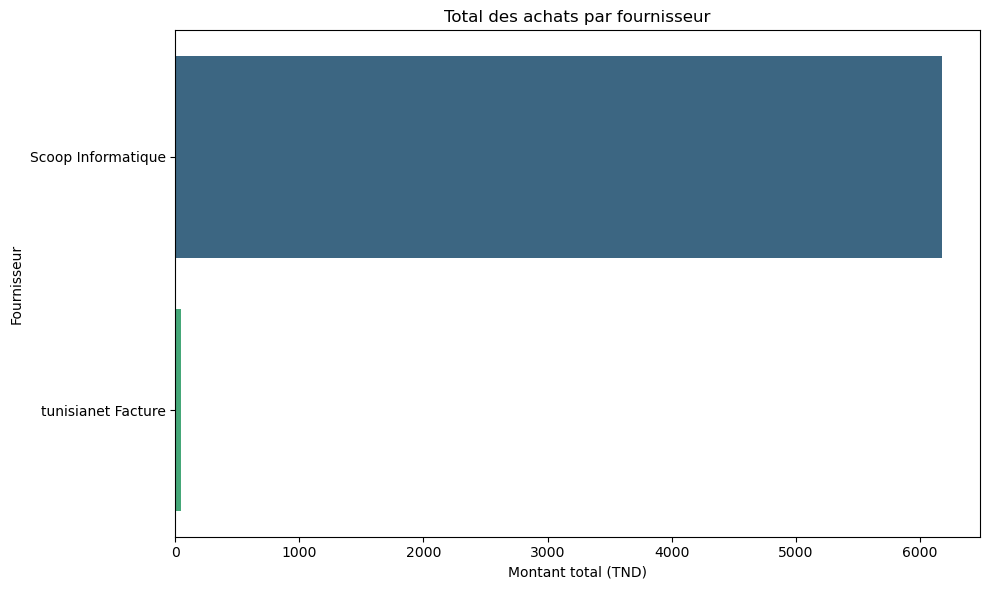

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

df_by_fournisseur = df_all.groupby("fournisseur")["montant"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=df_by_fournisseur, x="montant", y="fournisseur", hue="fournisseur", palette="viridis", legend=False)
plt.title("Total des achats par fournisseur")
plt.xlabel("Montant total (TND)")
plt.ylabel("Fournisseur")
plt.tight_layout()
plt.show()


Total factures : 7
Dépenses totales : 6226.90 TND
Moyenne par facture : 889.56 TND


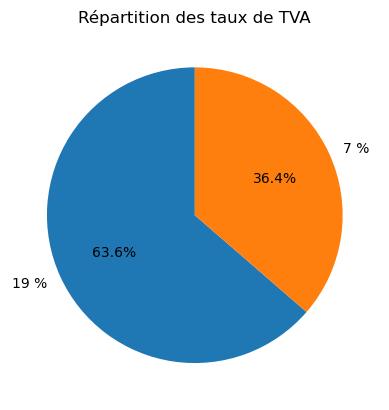

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Préparation
df_achat["montant"] = pd.to_numeric(df_achat["montant"], errors="coerce")
df_achat["qte"] = pd.to_numeric(df_achat["qte"], errors="coerce")
df_facture["date"] = pd.to_datetime(df_facture["date"], errors="coerce")

# Métriques générales
total_factures = df_facture["num_facture"].nunique()
total_depense = df_achat["montant"].sum()
moyenne_facture = df_achat.groupby("num_facture")["montant"].sum().mean()
tva_par_ligne = df_achat["tva"].value_counts(normalize=True) * 100

# Affichage
print(f"Total factures : {total_factures}")
print(f"Dépenses totales : {total_depense:.2f} TND")
print(f"Moyenne par facture : {moyenne_facture:.2f} TND")

tva_par_ligne.plot(kind="pie", autopct='%1.1f%%', title="Répartition des taux de TVA", startangle=90)
plt.ylabel("")
plt.show()


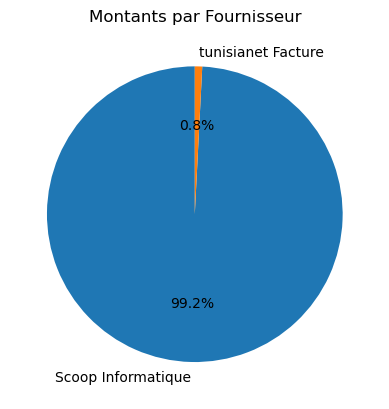

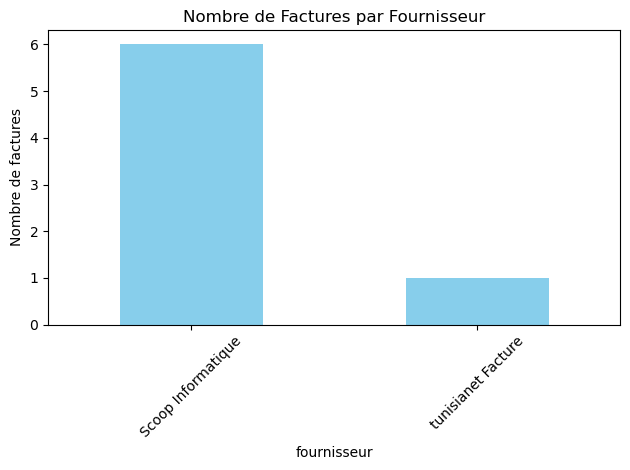

In [43]:
# Fusion pour analyse fournisseur
df_full = pd.merge(df_achat, df_facture[["num_facture", "fournisseur"]], on="num_facture", how="left")

# Montants par fournisseur
montant_par_fournisseur = df_full.groupby("fournisseur")["montant"].sum().sort_values(ascending=False)
factures_par_fournisseur = df_facture["fournisseur"].value_counts()

# Camembert montants
montant_par_fournisseur.plot(kind="pie", autopct='%1.1f%%', title="Montants par Fournisseur", startangle=90)
plt.ylabel("")
plt.show()

# Histogramme factures
factures_par_fournisseur.plot(kind="bar", title="Nombre de Factures par Fournisseur", color="skyblue")
plt.ylabel("Nombre de factures")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


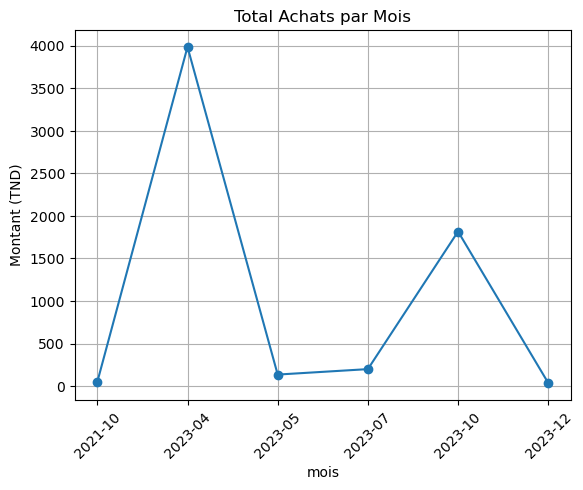

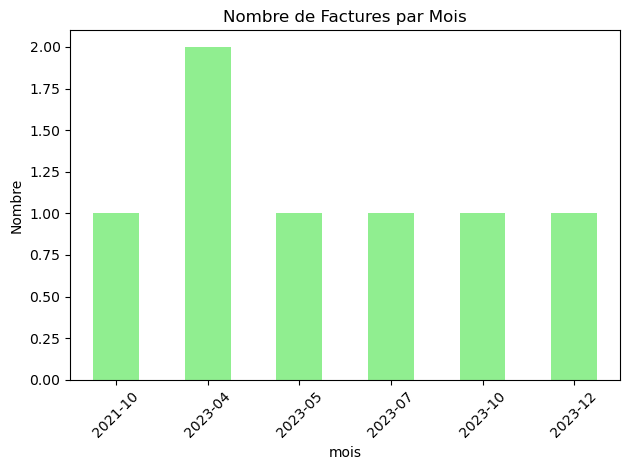

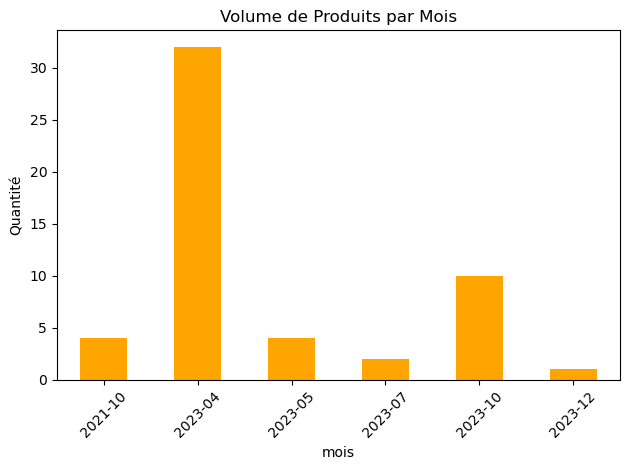

In [44]:
# Fusion pour date
df_full = pd.merge(df_achat, df_facture[["num_facture", "date"]], on="num_facture", how="left")
df_full["mois"] = df_full["date"].dt.to_period("M").astype(str)

# Agrégats mensuels
achat_par_mois = df_full.groupby("mois")["montant"].sum()
factures_par_mois = df_full.groupby("mois")["num_facture"].nunique()
volume_par_mois = df_full.groupby("mois")["qte"].sum()

# Graphiques
achat_par_mois.plot(kind="line", marker="o", title="Total Achats par Mois")
plt.ylabel("Montant (TND)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

factures_par_mois.plot(kind="bar", title="Nombre de Factures par Mois", color="lightgreen")
plt.ylabel("Nombre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

volume_par_mois.plot(kind="bar", color="orange", title="Volume de Produits par Mois")
plt.ylabel("Quantité")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


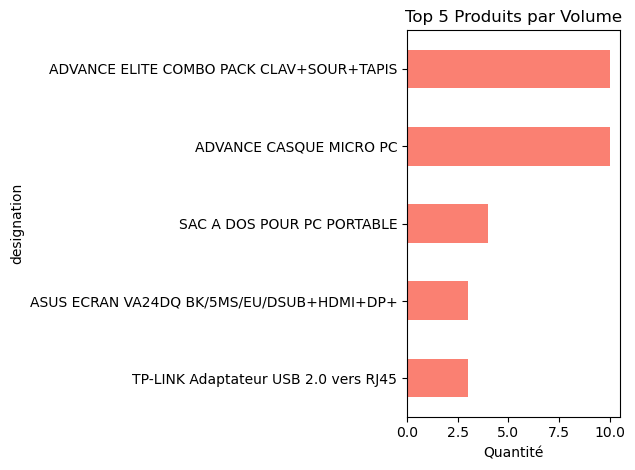

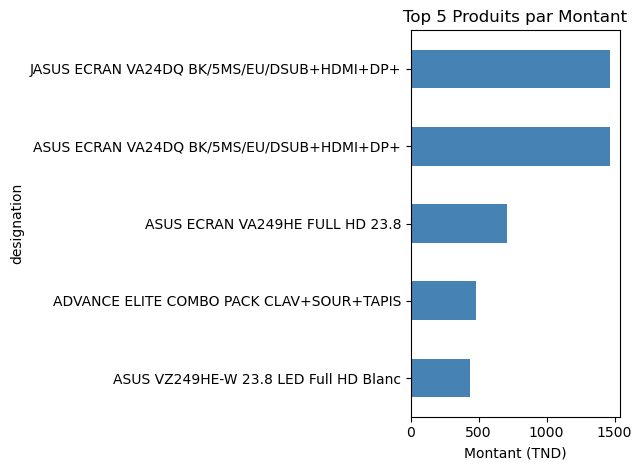

In [45]:
# Top produits
top_volume = df_achat.groupby("designation")["qte"].sum().sort_values(ascending=False).head(5)
top_montant = df_achat.groupby("designation")["montant"].sum().sort_values(ascending=False).head(5)

# Affichage volume
top_volume.plot(kind="barh", color="salmon", title="Top 5 Produits par Volume")
plt.xlabel("Quantité")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Affichage montant
top_montant.plot(kind="barh", color="steelblue", title="Top 5 Produits par Montant")
plt.xlabel("Montant (TND)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
